In [1]:
import subprocess
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# https://www.compchems.com/clustering-frames-with-gromacs/
# https://ctlee.github.io/BioChemCoRe-2018/clustering/

In [2]:
directory = "cluster"
current_directory = os.getcwd()
new_directory = os.path.join(current_directory, directory)
print(new_directory)
os.makedirs(new_directory, exist_ok=True)

/mnt/dhy/Analysis/only_serf/MDanal/cluster


In [3]:
# select group 1 (protein) and then save/exit
!echo -e "1\nq\n" | gmx make_ndx -f ../dynamic.gro -o vars/dynamic_index.ndx

cat: write error: Broken pipe
               :-) GROMACS - gmx make_ndx, 2024.2-conda_forge (-:

Executable:   /opt/conda/envs/gromacs/bin.AVX2_256/gmx
Data prefix:  /opt/conda/envs/gromacs
Working dir:  /mnt/dhy/Analysis/only_serf/MDanal
Command line:
  gmx make_ndx -f ../dynamic.gro -o vars/dynamic_index.ndx


Reading structure file
Going to read 0 old index file(s)
Analysing residue names:
There are:  2950    Protein residues
There are: 213530      Other residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

  0 System              : 219980 atoms
  1 Protein             :  6450 atoms
  2 Protein-H           :  6450 atoms
  3 C-alpha             :     0 atoms
  4 Backbone            :     0 atoms
  5 MainChain           :     0 atoms
  6 MainChain+Cb        :     0 atoms
  7 MainChain+H         :     0 atoms
  8 SideChain           :  6450 atoms
  9 SideChain-H         :  6450 atoms
 10 Prot-Masses         :  6450 atoms


In [4]:
C_a = []
# Get backbone indices
with open("../Protein_A.itp", "r") as f:
    lines = f.readlines()
    for line in lines:
        if line.strip():
            # Ignore comment lines
            if line[0] == ";": continue
            # break if we reached the bonds seciton
            if "bonds" in line: break
            parts = line.split()
            # check for safe access and then if backbone is there
            if len(parts) >= 6 and parts[4] == "BB":
                C_a.append(parts[0])                
print(len(C_a))


59


In [5]:
# Get backbone group index for proteins
num_proteins = 50
residues_per_protein = 129

# Initialize starting residue number to 0
start_residue = 0

C_a = [int(elem) for elem in C_a]
print(C_a)
C_ALL = ""
# Open the existing index file to append protein groups
with open("vars/dynamic_index.ndx", "a") as index_file:
    for i in range(num_proteins):
        # Define group name for each protein
        group_name = f"CA_{i + 1}"

        # Write the group header
        index_file.write(f"[ {group_name} ]\n")
        
        # Write residue numbers for this protein
        residues = " ".join(str(bead_id + start_residue) for bead_id in C_a)
        C_ALL = f"{C_ALL}{residues}\n"
        index_file.write(f"{residues}\n\n")
        
        # Update start residue for the next protein
        start_residue = start_residue + residues_per_protein

    index_file.write(f"[ C_ALL ]\n")
    index_file.write(C_ALL)
print("Index file 'dynamic_index.ndx' updated with Alpha Carbons of the protein groups!")

[1, 3, 5, 8, 9, 11, 13, 16, 18, 20, 21, 24, 26, 29, 31, 33, 36, 39, 41, 43, 45, 47, 49, 52, 53, 56, 59, 62, 64, 66, 67, 69, 71, 72, 73, 74, 77, 80, 82, 85, 87, 89, 91, 93, 95, 97, 99, 102, 104, 107, 110, 111, 113, 115, 118, 121, 123, 125, 127]
Index file 'dynamic_index.ndx' updated with Alpha Carbons of the protein groups!


In [6]:
# Number of proteins and residues per protein
num_proteins = 50
residues_per_protein = 129

# Initialize starting residue number
start_residue = 1

# Open the existing index file to append protein groups
with open("vars/dynamic_index.ndx", "a") as index_file:
    for i in range(num_proteins):
        # Define group name for each protein
        group_name = f"Protein_{i + 1}"
        
        # Calculate residue range for this protein
        end_residue = start_residue + residues_per_protein - 1
        
        # Write the group header
        index_file.write(f"[ {group_name} ]\n")
        
        # Write residue numbers for this protein
        residues = " ".join(map(str, range(start_residue, end_residue + 1)))
        index_file.write(f"{residues}\n\n")
        
        # Update start residue for the next protein
        start_residue = end_residue + 1

print("Index file 'dynamic_index.ndx' updated with individual protein groups!")

Index file 'dynamic_index.ndx' updated with individual protein groups!


In [ ]:
#IF need to remove all atoms besides the proteins
!echo -e "1\n" | gmx trjconv -f ../dynamic.xtc -s ../dynamic.tpr -o vars/protein_only.xtc -n vars/dynamic_index.ndx
!echo -e "1\n" | gmx trjconv -f ../dynamic.gro -o ../protein_only.gro -s ../dynamic.tpr -n vars/dynamic_index.ndx
!gmx grompp -f ../dynamic.mdp -n protein_only_index.ndx -c protein_only.gro -p protein_only.top -o dynamic_protein_only.tpr


#work in progress

cat: write error: Broken pipe
               :-) GROMACS - gmx trjconv, 2024.2-conda_forge (-:

Executable:   /opt/conda/envs/gromacs/bin.AVX2_256/gmx
Data prefix:  /opt/conda/envs/gromacs
Working dir:  /home/alexeyk/Desktop/simulations/Finished/serf_peg
Command line:
  gmx trjconv -f dynamic.xtc -s dynamic.tpr -o protein_only.xtc -n dynamic_index.ndx

Note that major changes are planned in future for trjconv, to improve usability and utility.
Will write xtc: Compressed trajectory (portable xdr format): xtc
Reading file dynamic.tpr, VERSION 2024.2-conda_forge (single precision)
Reading file dynamic.tpr, VERSION 2024.2-conda_forge (single precision)
Select group for output
Group     0 (         System) has 230186 elements
Group     1 (        Protein) has  6450 elements
Group     2 (      Protein-H) has  6450 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChai

In [9]:

!gmx clustsize -f protein_only.xtc -s dynamic_protein_only.tpr -n dynamic_index.ndx -cut 0.6 -mol -pbc \
-nc {new_directory}/nclust_protonly.xvg -mc {new_directory}/maxclust_protonly.xvg -ac {new_directory}/avclust_protonly.xvg \
-hc {new_directory}/histo-clust_protonly.xvg -o {new_directory}/csize.xpm -w
# This worked: anything less that 0.5 crashes in different ways
#gmx clustsize -f protein_only.xtc -s dynamic_protein_only.tpr -n dynamic_index.ndx -cut 0.5 -mol -pbc -nc /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/nclust_protonly.xvg -mc /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/maxclust_protonly.xvg -ac /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/avclust_protonly.xvg -hc /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/histo-clust_protonly.xvg

              :-) GROMACS - gmx clustsize, 2024.2-conda_forge (-:

Executable:   /opt/conda/envs/gromacs/bin.AVX2_256/gmx
Data prefix:  /opt/conda/envs/gromacs
Working dir:  /home/alexeyk/Desktop/simulations/Finished/serf_peg
Command line:
  gmx clustsize -f protein_only.xtc -s dynamic_protein_only.tpr -n dynamic_index.ndx -cut 0.6 -mol -pbc -nc /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/nclust_protonly.xvg -mc /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/maxclust_protonly.xvg -ac /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/avclust_protonly.xvg -hc /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/histo-clust_protonly.xvg -o /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/csize.xpm -w


Back Off! I just backed up /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/nclust_protonly.xvg to /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/#nclust_protonly.xvg.2#

Back Off! I just backed up /home/alexey

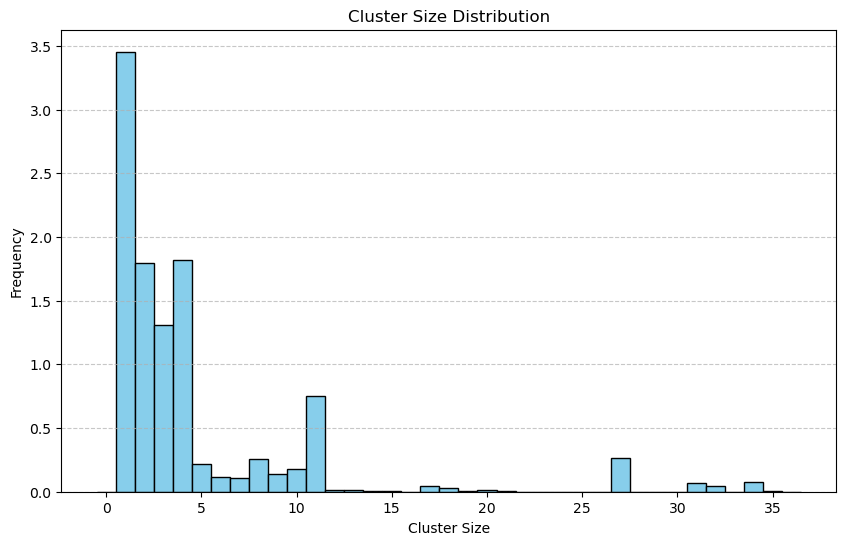

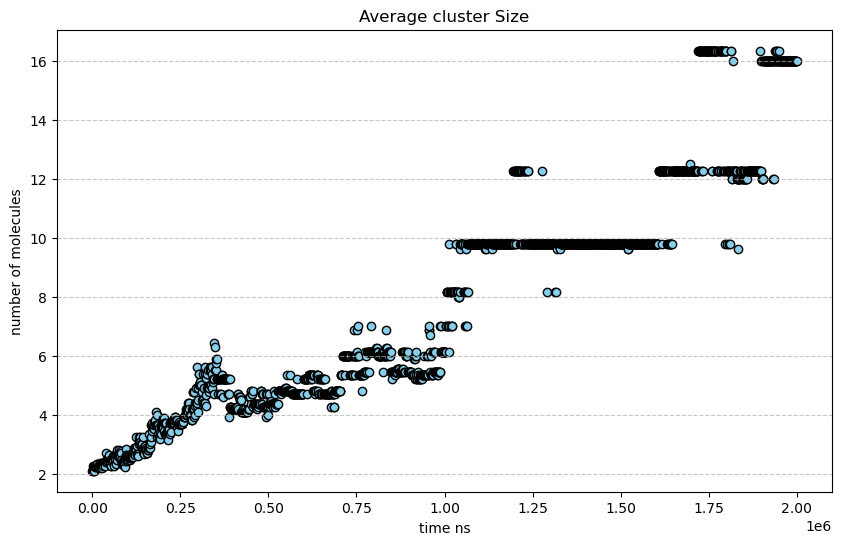

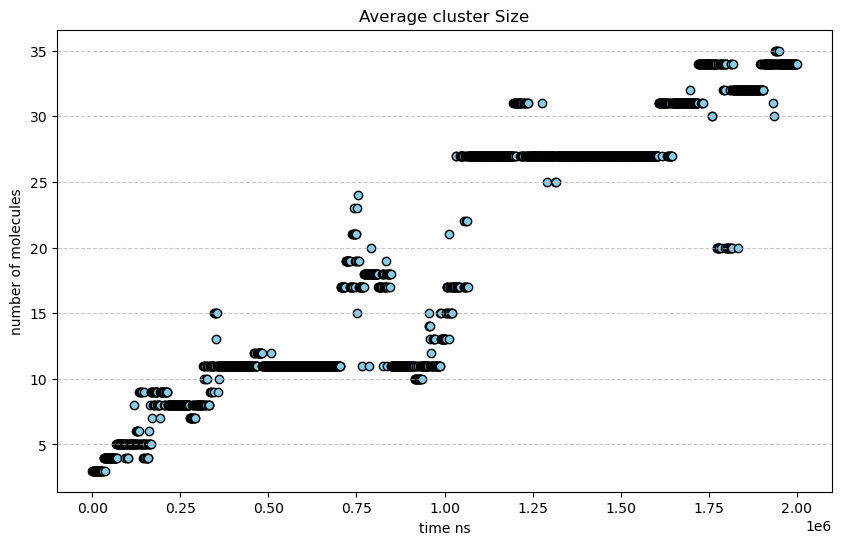

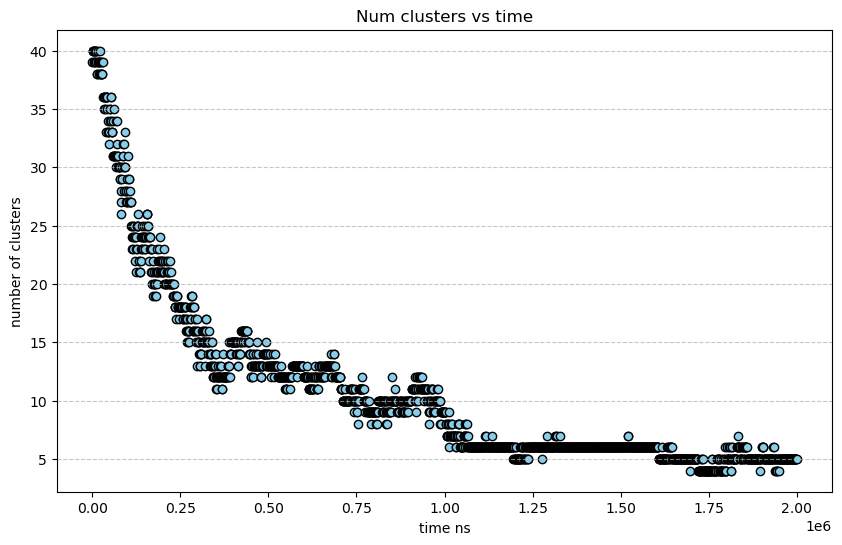

In [ ]:
# or try this if we don't want to do clustering by molecules
# !gmx clustsize -f dynamic.xtc -s dynamic.tpr -n dynamic_index.ndx -cut 0.7 -pbc -nc {new_directory}/nclust.xvg \
# -mc {new_directory}/maxclust.xvg -ac {new_directory}/avclust.xvg -hc {new_directory}/histo-clust.xvg
# Helper function to load .xvg files with two-column data


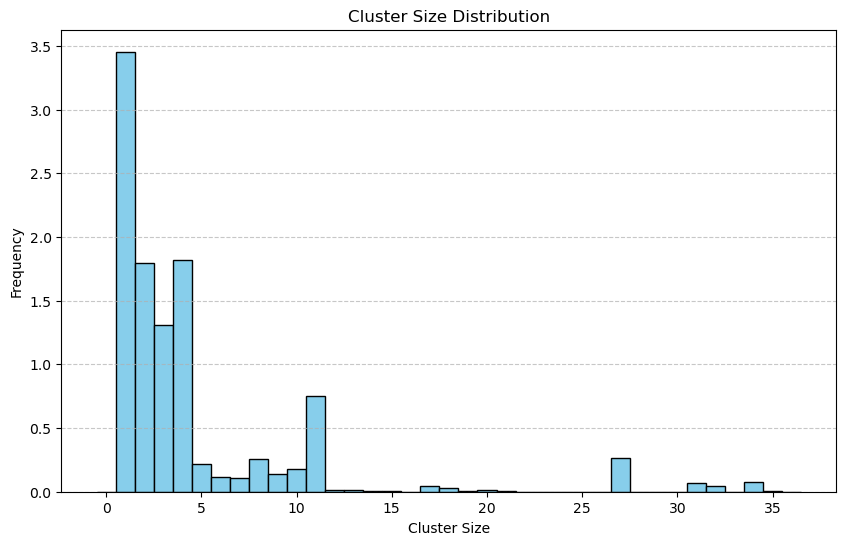

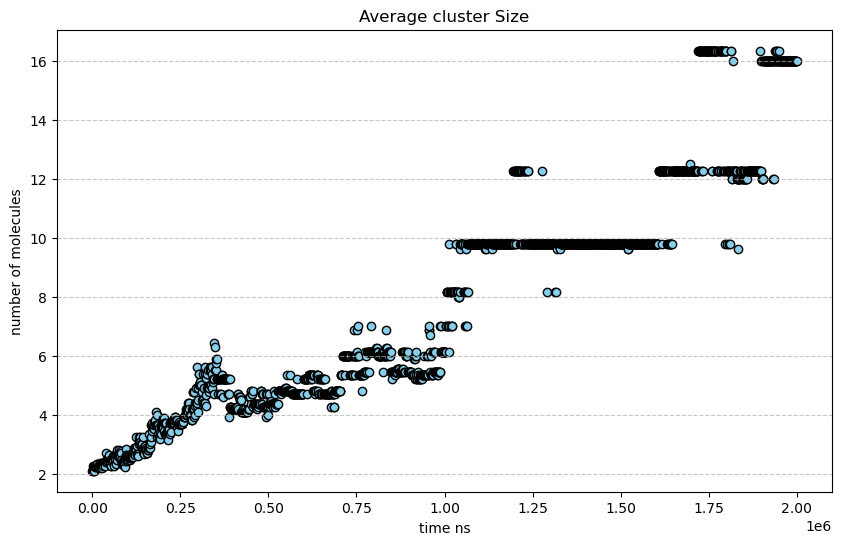

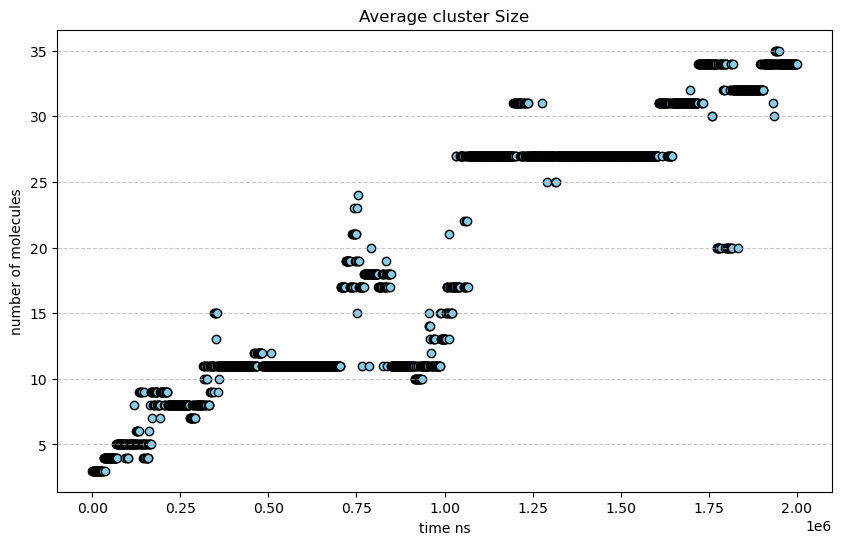

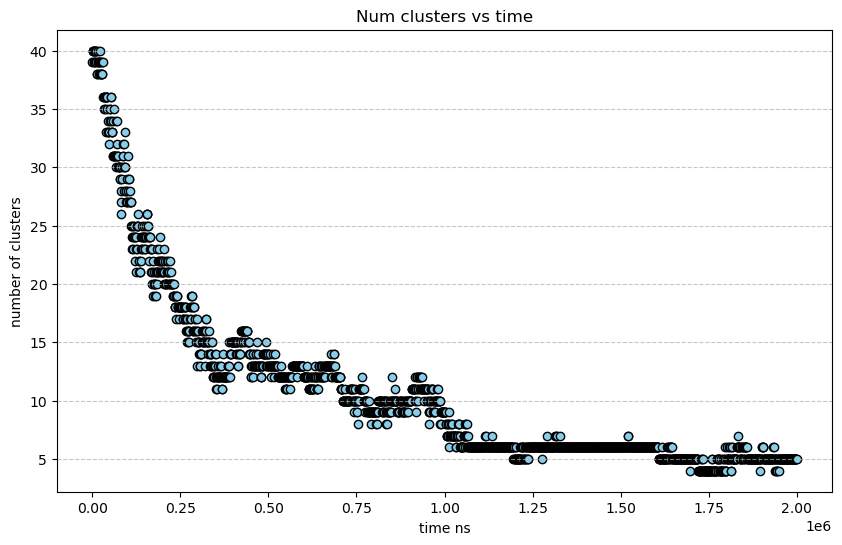

In [17]:
# Helper function to load .xvg files with two-column data
def load_xvg(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            # Skip comment lines
            if line.startswith('#') or line.startswith('@'):
                continue
            # Split the line and parse as float
            parts = line.split()
            if len(parts) == 2:  # Ensure there are exactly two columns
                data.append([float(parts[0]), float(parts[1])])  # Take the two columns
    return pd.DataFrame(data, columns=['xaxis', 'yaxis'])

# Load the histogram data
#xvg_file = f"{new_directory}/histo-clust.xvg"  # Replace with the actual path to your file
xvg_file = f"{new_directory}/histo-clust_protonly.xvg" 
data = load_xvg(xvg_file)

# Plot the histogram as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(data['xaxis'], data['yaxis'], width=1.0, color='skyblue', edgecolor='k')
plt.xlabel("Cluster Size")
plt.ylabel("Frequency")
plt.title("Cluster Size Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Set x-axis limits
#plt.xlim(right=) 
plt.show()


# Load the histogram data
#xvg_file = f"{new_directory}/avclust.xvg"  # Replace with the actual path to your file
xvg_file = f"{new_directory}/avclust_protonly.xvg"  # Replace with the actual path to your file
data = load_xvg(xvg_file)
plt.figure(figsize=(10, 6))
plt.scatter(data['xaxis'], data['yaxis'], color='skyblue', edgecolor='k')
plt.xlabel("time ns")
plt.ylabel("number of molecules")
plt.title("Average cluster Size")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

xvg_file = f"{new_directory}/maxclust_protonly.xvg"  # Replace with the actual path to your file
data = load_xvg(xvg_file)
plt.figure(figsize=(10, 6))
plt.scatter(data['xaxis'], data['yaxis'], color='skyblue', edgecolor='k')
plt.xlabel("time ns")
plt.ylabel("number of molecules")
plt.title("Average cluster Size")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Load the histogram data
#xvg_file = f"{new_directory}/nclust.xvg"  # Replace with the actual path to your file
xvg_file = f"{new_directory}/nclust_protonly.xvg"  # Replace with the actual path to your file
data = load_xvg(xvg_file)
plt.figure(figsize=(10, 6))
plt.scatter(data['xaxis'], data['yaxis'], color='skyblue', edgecolor='k')
plt.xlabel("time ns")
plt.ylabel("number of clusters")
plt.title("Num clusters vs time")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [30]:
!gmx rdf -f dynamic.xtc -s dynamic.tpr -n dynamic_index.ndx -o {new_directory}/rdf.xvg -pbc -ref 'Prot1' -sel '1' -cn {new_directory}/cn_rdf.xvg

cat: write error: Broken pipe
                 :-) GROMACS - gmx rdf, 2024.2-conda_forge (-:

Executable:   /home/alexeyk/miniconda3/envs/gromacs_cuda/bin.AVX2_256/gmx
Data prefix:  /home/alexeyk/miniconda3/envs/gromacs_cuda
Working dir:  /home/alexeyk/Desktop/simulations/Finished/serf_peg
Command line:
  gmx rdf -f dynamic.xtc -s dynamic.tpr -n dynamic_index.ndx -o /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/rdf.xvg -pbc -ref Prot1 -sel 1 -cn /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/cn_rdf.xvg

Reading file dynamic.tpr, VERSION 2024.2-conda_forge (single precision)
Reading file dynamic.tpr, VERSION 2024.2-conda_forge (single precision)
Last frame       2000 time 2000000.000   
Analyzed 2001 frames, last time 2000000.000

Back Off! I just backed up /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/rdf.xvg to /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/#rdf.xvg.4#

Back Off! I just backed up /home/alexeyk/Desktop/simulations/F

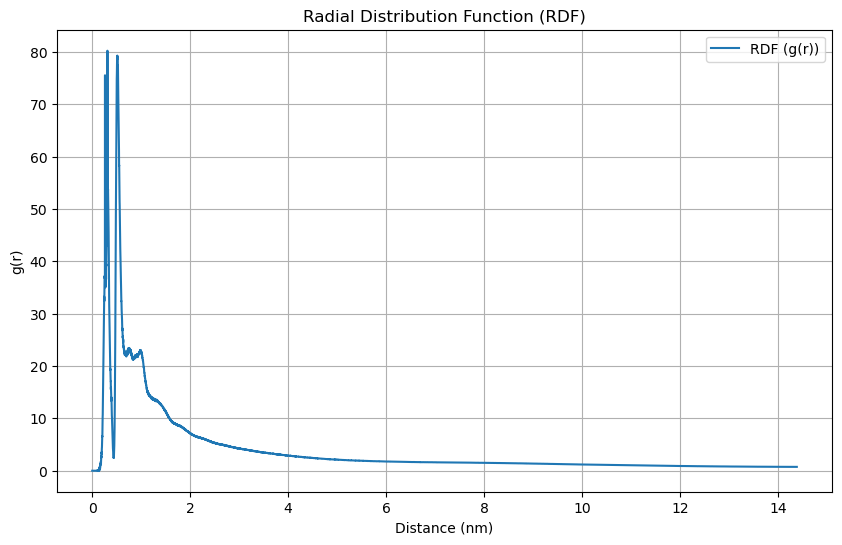

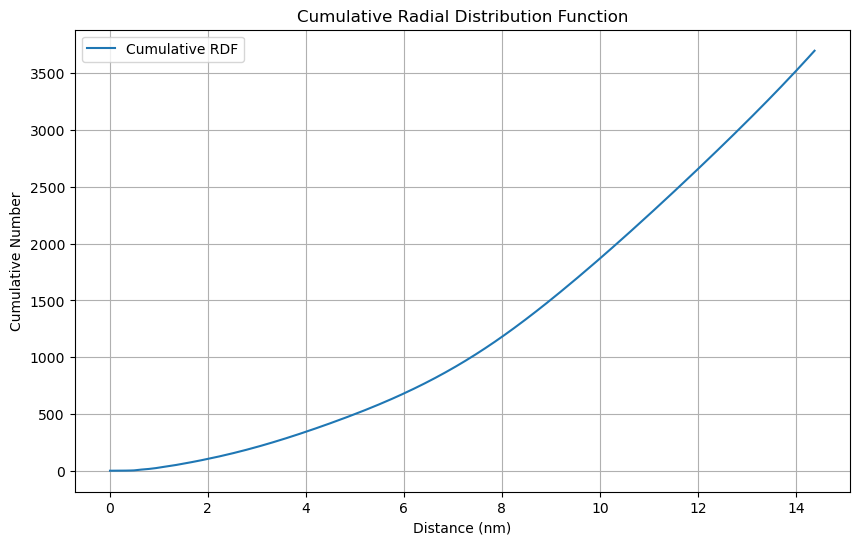

In [31]:
# Load RDF and cumulative RDF data
rdf_data = load_xvg(f"{new_directory}/rdf.xvg")
cn_rdf_data = load_xvg(f"{new_directory}/cn_rdf.xvg")
# Plot RDF
plt.figure(figsize=(10, 6))
plt.plot(rdf_data["xaxis"], rdf_data["yaxis"], label="RDF (g(r))")
plt.xlabel("Distance (nm)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Function (RDF)")
plt.legend()
plt.grid(True)
plt.show()

# Plot Cumulative RDF
plt.figure(figsize=(10, 6))
plt.plot(cn_rdf_data["xaxis"], cn_rdf_data["yaxis"], label="Cumulative RDF")
plt.xlabel("Distance (nm)")
plt.ylabel("Cumulative Number")
plt.title("Cumulative Radial Distribution Function")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
# Contact Map
!gmx mdmat -f dynamic.xtc -s dynamic.tpr \
-mean {new_directory}/dm.xpm -frames {new_directory}/dmf.xpm \
-no {new_directory}/num.xvg

cat: write error: Broken pipe
                :-) GROMACS - gmx mdmat, 2024.2-conda_forge (-:

Executable:   /home/alexeyk/miniconda3/envs/gromacs_cuda/bin.AVX2_256/gmx
Data prefix:  /home/alexeyk/miniconda3/envs/gromacs_cuda
Working dir:  /home/alexeyk/Desktop/simulations/Finished/serf_peg
Command line:
  gmx mdmat -f dynamic.xtc -s dynamic.tpr -mean /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/dm.xpm -frames /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/dmf.xpm -no /home/alexeyk/Desktop/simulations/Finished/serf_peg/cluster/num.xvg

Will truncate at 1.500000 nm
Will calculate number of different contacts
Reading file dynamic.tpr, VERSION 2024.2-conda_forge (single precision)
Reading file dynamic.tpr, VERSION 2024.2-conda_forge (single precision)
Select group for analysis
Group     0 (         System) has 230186 elements
Group     1 (        Protein) has  6450 elements
Group     2 (      Protein-H) has  6450 elements
Group     3 (        C-alpha) has     0